<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning_All/blob/main/Regression_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Support Vector Machine**
**Author:** Siddik Barbhuiya

**Email:** siddikbarbhuiya@gmail.com


In machine learning, Support Vector Machines (SVMs) are tools that help in analyzing data for both classification and prediction purposes. When using SVMs for prediction, which is called **Support Vector Regression**, we use a special line, known as the hyperplane, to best represent the data.


In machine learning, the Support Vector Machine (SVM) is a tool designed to analyze and categorize data. When we want to predict numerical values using SVM, it becomes what we call Support Vector Regression (SVR). The key idea of SVR is to represent data using a special line or curve, known as the hyperplane, which best fits the given data points.

**Understanding SVR Hyperparameters:**
* Hyperplane: The hyperplane is like our prediction line in SVR. It's the line or curve that we draw to represent our predicted values. The data points closest to this hyperplane, on either side, are termed as Support Vectors. They play a crucial role in defining the position and direction of the hyperplane.

* Kernel: Kernels are mathematical tools that take our data and transform it, often into a higher dimension, making it easier to find our hyperplane. Depending on the data, different kernels might be used, such as Linear, Polynomial, Radial Basis Function (RBF), or Sigmoid. Typically, the RBF kernel is the default choice, but the ideal kernel often depends on the specific dataset.

* Boundary Lines:
Around our main prediction line (the hyperplane), we have two lines which create a kind of margin. This margin is defined by a value called epsilon (ε). These boundary lines ensure there's a buffer or margin of error in our predictions.

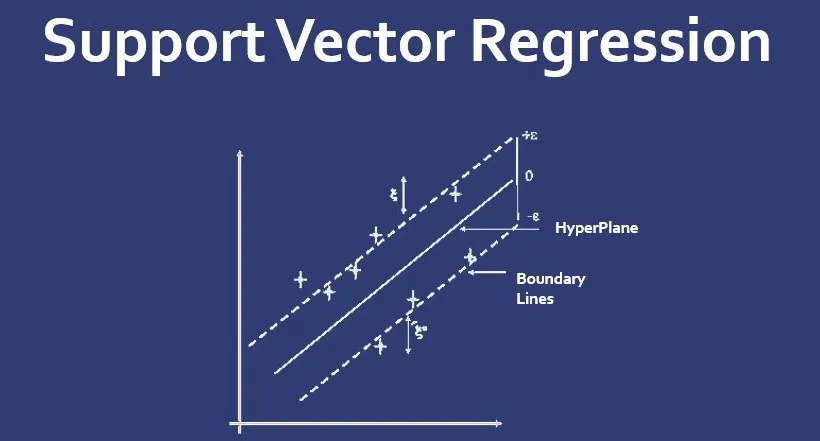

(Image:https://medium.com/analytics-vidhya/support-vector-regression-for-machine-learning-843978ba6279)

**Diving into Support Vector Regression:**

SVR operates on principles similar to the classic SVM. While most regression models aim to reduce the difference between the predicted and actual values, SVR's goal is slightly different. SVR aims to ensure that differences (or errors) lie within a certain boundary.

A unique aspect of SVR is its approach to errors. Instead of trying to completely eliminate them, it focuses on keeping them within a certain range. This range is defined by those boundary lines we talked about earlier.

However, one limitation of SVR is its scalability. As the dataset grows, SVR can become computationally intensive, making it challenging to work with very large datasets. In such cases, alternatives like Linear SVR or SGD Regressor are more suitable. While Linear SVR is faster, it only works with the linear kernel. The outcome of SVR is influenced by a subset of training data, especially when predictions are near their actual targets.

In [35]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#importing the dataset
dataset= pd.read_csv("Position.csv")


X= dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1:].values

In [52]:
#Feature Engineering
sc_X=StandardScaler ()
sc_y=StandardScaler ()
X= sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))


In [53]:
#Traning the SVR on the whole dataset
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 0.1, 1, 10],
              'degree': [2, 3, 4, 5],
              'gamma': ['scale', 'auto']}

# GridSearch to find the best parameters
grid_search = GridSearchCV(estimator=SVR(), param_grid=parameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)
best_parameters = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Training the SVR model using the best parameters
regressor = SVR(kernel=best_parameters['kernel'], C=best_parameters['C'], degree=best_parameters['degree'], gamma=best_parameters['gamma'])
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, degree=2, gamma='auto')

In [57]:
y_predicted = regressor.predict(X)

In [63]:
y_pred = sc_y.inverse_transform(y_predicted.reshape(-1,1))


In [64]:
#Calculate the MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.011388243200468499
R^2 Score: 0.9886117567995315


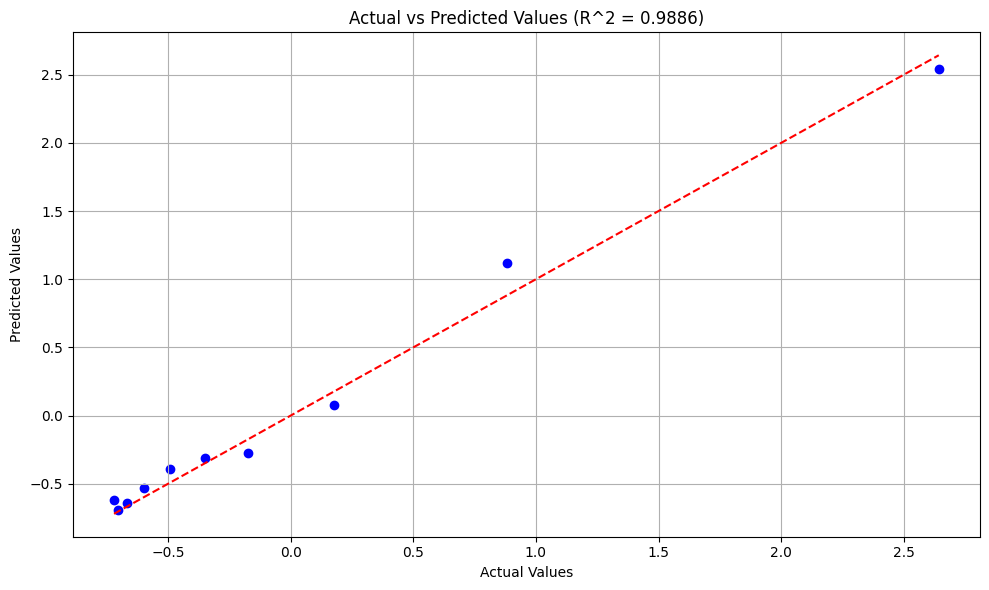

In [66]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, y_predicted, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title(f'Actual vs Predicted Values (R^2 = {r2:.4f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

**Limitation of SVR**
* They are not suitable for large datasets.
* In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
* The Decision model does not perform very well when the data set has more noise i.e. target classes are overlapping..